In [53]:
# from ggplot import *
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv("loans_full_schema.csv")
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


The loans_full_schema.csv file represents loans made through Lending Fund.  Each row highlights an individual who has taken out a loan with the relevant information associated to the loan they took out such as job title, state, annual income, remaining loan, and type of homeownership they have.  One of the main issues with the dataset is there are various occurances of NaN values, meaning they could not be interpreted as values.  If we choose to drop NaN values from this dataset, this would take out associated rows that hold NaN values - therefore, we will be missing data in our analyses.

/Users/alexsterchele/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


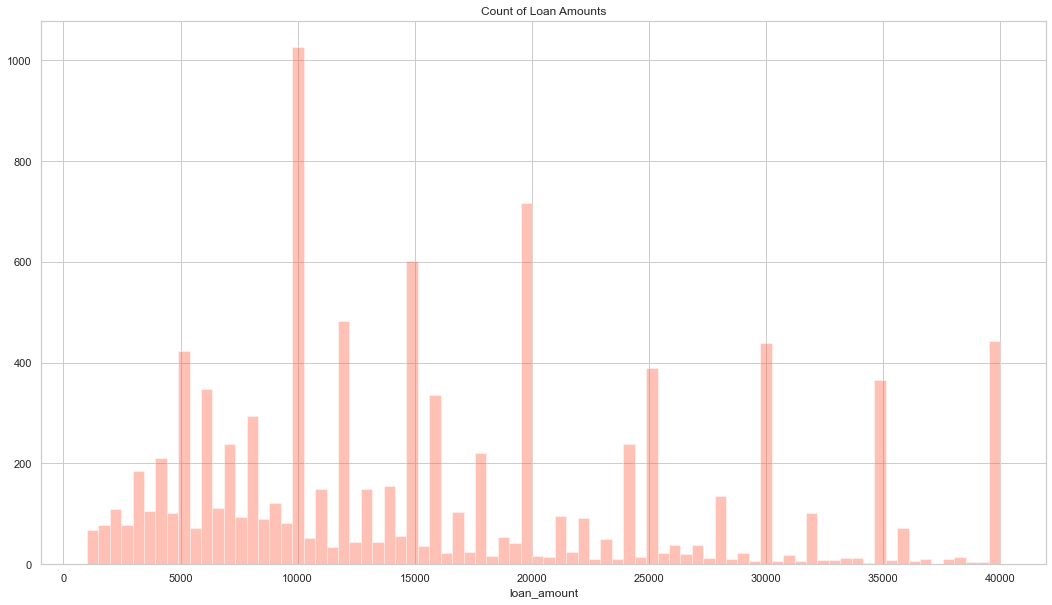

In [20]:
#visualization 1
with sns.plotting_context("notebook",font_scale=1):
    sns.set_style("whitegrid")
    sns.distplot(df["loan_amount"].dropna(),
                     bins=80,
                     kde=False,
                     color="tomato").set_title("Count of Loan Amounts")
    sns.set(rc={'figure.figsize':(18,10)})
#     plt.ylabel("Count")
# sns.set(rc={'figure.figsize':(11.7,8.27)})

The above visualization illustrates the number of loan amounts throughout the entire dataset.  We can establish that the largest loan taken out was $10,00 with $20,000 close behind.  The largest loan taken out is $40,000 with over 400 people taking out this loan.

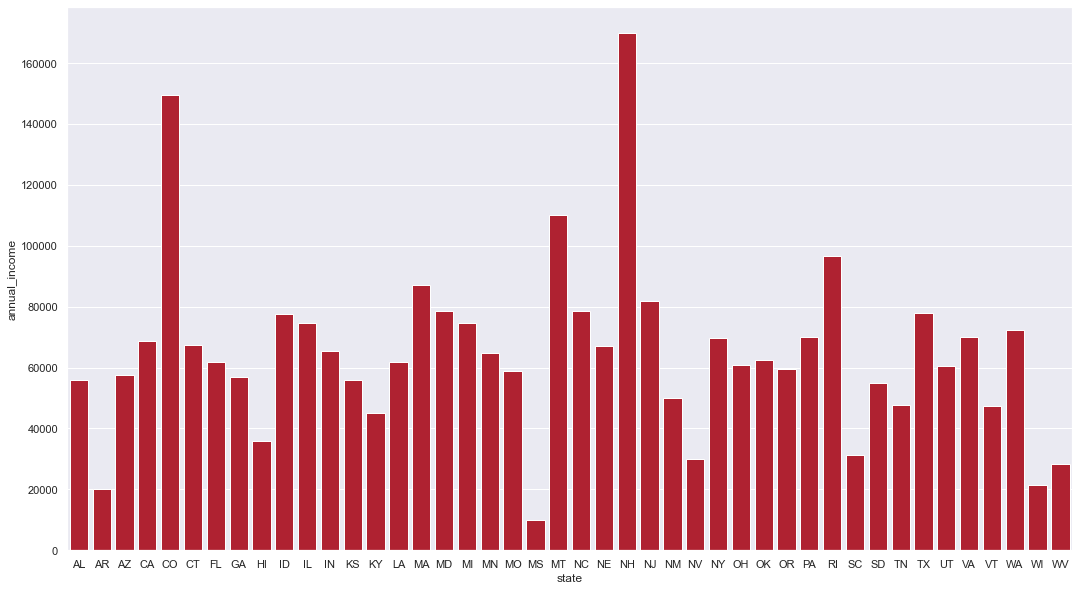

In [21]:
#visualization 2
state_grouped = df.copy().dropna()
state_grouped = state_grouped.groupby('state')['annual_income'].apply(np.mean).to_frame().reset_index()
sns.barplot(data=state_grouped, y='annual_income', x='state', color="#c60b1e")
sns.set(rc={'figure.figsize':(18,10)})
# plt.xticks(rotation=90)
# state_grouped

The above bar plot illustrates the average income per state with the data provided in the dataset. the states with the highest mean income is New Hampshire and Colorado with Missouri, Arkansas, and Wisconsin with the lowest incomes.

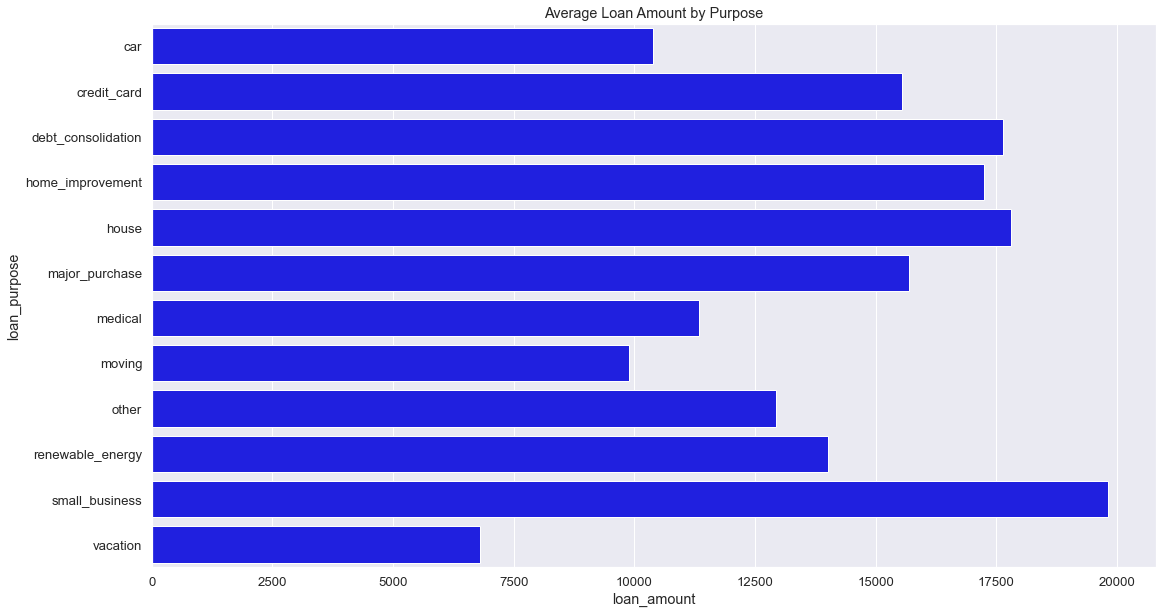

In [22]:
loan_type_grouped = df.copy()
loan_type_grouped = loan_type_grouped.groupby('loan_purpose')['loan_amount'].mean().to_frame().reset_index()
with sns.plotting_context("notebook",font_scale=1.2):
    sns.barplot(data=loan_type_grouped, x='loan_amount', y='loan_purpose', color='blue').set_title("Average Loan Amount by Purpose")
    sns.set_style("whitegrid")


The visual above represents the average loans taken out by purpose.  Small businesses and home loans have the highest average loan amount while vacation and moving loans are the least amount taken out.

Text(0.5, 1.0, 'Interest Rate vs. Paid Interest')

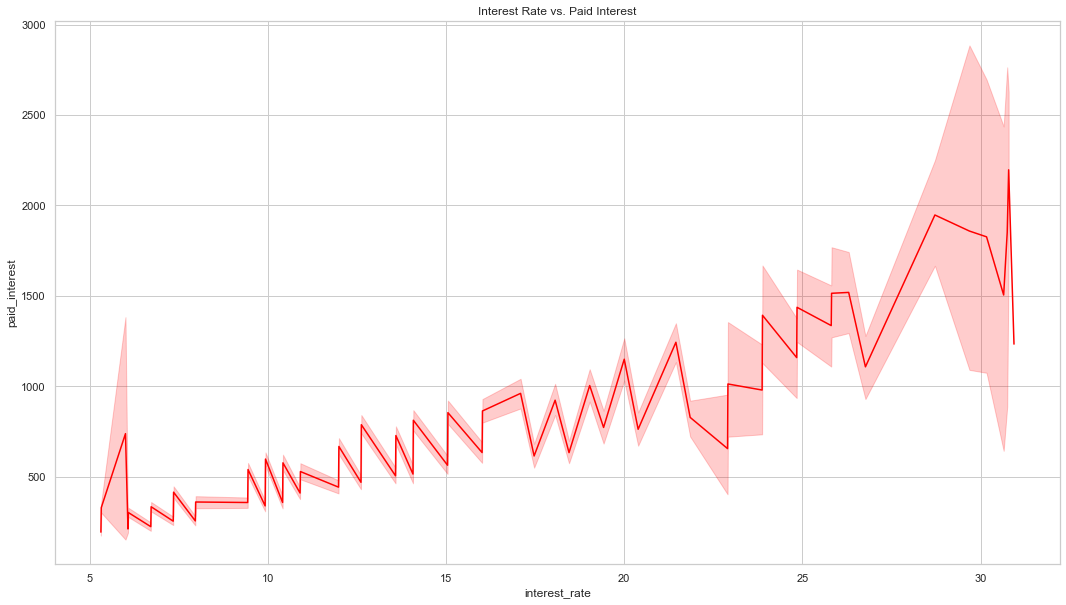

In [23]:
sns.lineplot(data=df, x='interest_rate', y='paid_interest', color='red').set_title('Interest Rate vs. Paid Interest')

The above figure represents the relationship between interest rate and paid interest amongst peope who have taken out loans.  As seen, the higher the interest rate, the higher the paid interest.

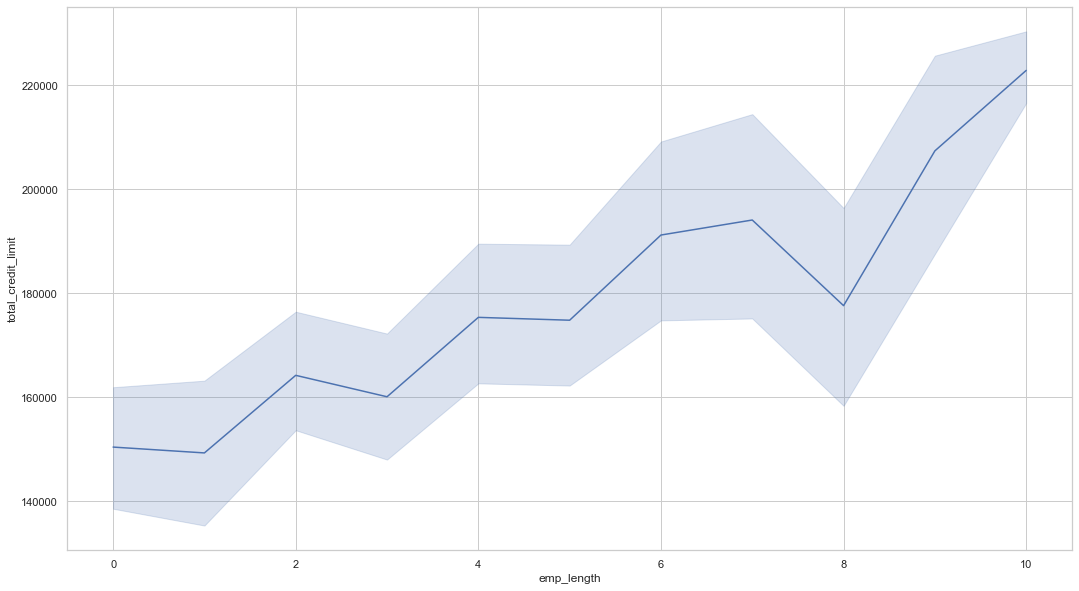

In [24]:
sns.lineplot(data=df, x='emp_length', y='total_credit_limit')

The visual above represents the relationship between employment length and total credit limit amongst people who take out loans, which in fact is a strong relationship.

In [25]:
lm = LinearRegression()
lm

LinearRegression()

In [33]:
x = df['loan_amount'].values
y = df['interest_rate'].values

array([14.07, 12.61, 17.09, ..., 23.88,  5.32, 10.91])

In [37]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = x.reshape(-1, 1)
X= sc.fit_transform(x)
X

array([[0.69230769],
       [0.1025641 ],
       [0.02564103],
       ...,
       [0.74358974],
       [0.58974359],
       [0.3025641 ]])

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 0)
X_train

array([[0.28205128],
       [0.07692308],
       [0.23076923],
       ...,
       [1.        ],
       [0.1025641 ],
       [0.19230769]])

In [48]:
df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

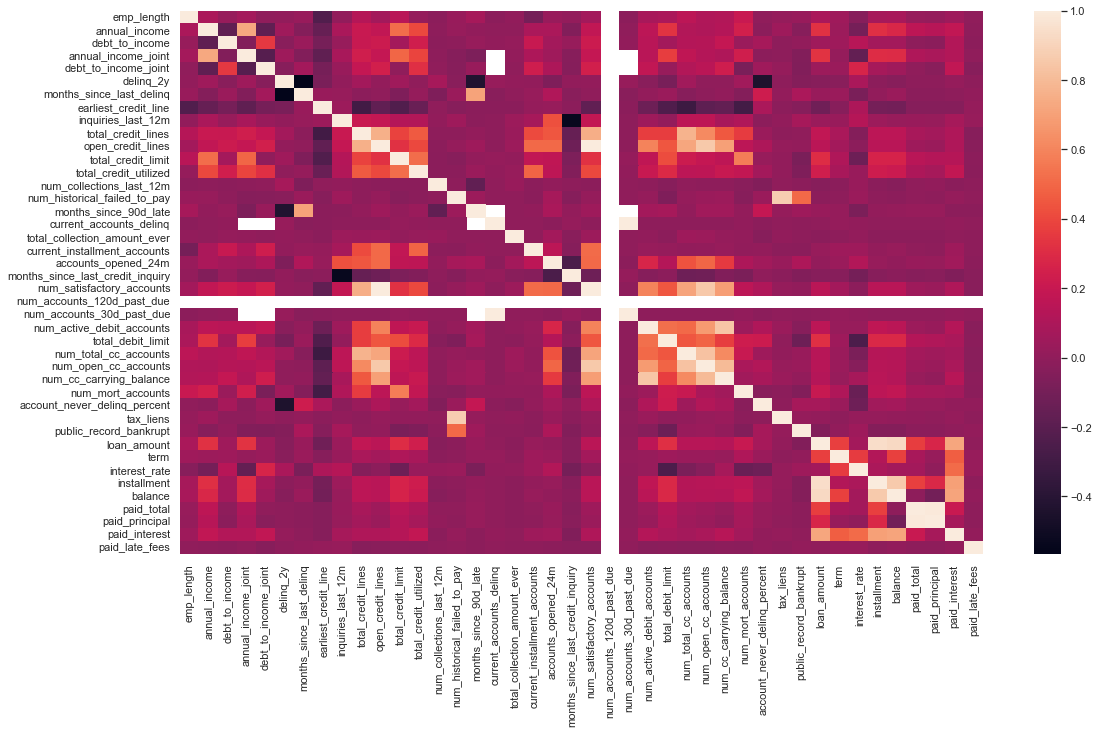

In [49]:
sns.heatmap(df.corr())

In [57]:
df = df.fillna(0)
X = df[['loan_amount', 'debt_to_income']].values
y = df['interest_rate']

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 0)

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = model.predict(X_test)
y_pred

array([13.02773023, 12.16067598, 12.2144819 , ..., 12.34417953,
       11.67452078, 12.34727113])

In [64]:
model.score(X_test, y_test)

0.030195615223523986

The above calculations are prediciting the interest rate. In order to do this I filled all Nan values with 0 so they could be calculated.